In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline  as pyo
import datetime as dt
import ipywidgets as widgest
from IPython.display import display 
from ipywidgets import interact, interact_manual
import pandas.plotting as pp
from pandas.plotting import autocorrelation_plot
#import lazypredict
from sklearn.utils import deprecated
import datetime


# from sklearn.utils._testing import ignore_warnings

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as stats
from scipy.stats import lognorm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.arima_model import ARIMA

#from arch import arch_model
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape)

In [5]:
import random
from collections import deque
from sklearn import preprocessing

In [6]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed,Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
import time

2023-04-18 21:28:08.537759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
start = dt.datetime(2020,1,1)
end =dt.datetime.now()
interval = '1d'

coins = ['ADA-USD',
 'ALGO-USD',
 'ANKR-USD',
 'ATOM-USD',
 'BAT-USD',
 'BCH-USD',
 'BNB-USD',
 'CHZ-USD',
 'CRO-USD',
 'DASH-USD',
 'DCR-USD',
 'DOGE-USD',
 'ENJ-USD',
 'EOS-USD',
 'ETC-USD',
 'FIL-USD',
 'FTM-USD',
 'FTT-USD',
 'HBAR-USD',
 'KAVA-USD',
 'LINK-USD',
 'LRC-USD',
 'LTC-USD',
 'MANA-USD',
 'MIOTA-USD',
 'MKR-USD',
 'NEO-USD',
 'RUNE-USD',
 'RVN-USD',
 'SNX-USD',
 'THETA-USD',
 'TRX-USD',
 'TUSD-USD',
 'VET-USD',
 'XEM-USD',
 'XLM-USD',
 'XMR-USD',
 'XRP-USD',
 'ZEC-USD']
df = yf.download(coins, start =start, end =end, interval = interval)

  

[*********************100%***********************]  39 of 39 completed


In [9]:
df

Adj Close                                                       \
             ADA-USD  ALGO-USD  ANKR-USD   ATOM-USD   BAT-USD     BCH-USD   
Date                                                                        
2020-01-01  0.033458  0.219938  0.001446   4.380158  0.196129  204.397537   
2020-01-02  0.032751  0.213518  0.001397   4.091817  0.183821  195.698563   
2020-01-03  0.034180  0.228098  0.001416   4.247897  0.187701  222.412979   
2020-01-04  0.034595  0.236382  0.001430   4.286356  0.189891  226.018692   
2020-01-05  0.034721  0.231657  0.001418   4.231877  0.188898  224.096527   
...              ...       ...       ...        ...       ...         ...   
2023-04-14  0.438330  0.227652  0.036314  12.262309  0.286126  132.494904   
2023-04-15  0.453280  0.232241  0.037160  12.394587  0.285833  132.805786   
2023-04-16  0.451755  0.234859  0.037015  12.697115  0.288967  134.453751   
2023-04-17  0.434167  0.220693  0.036002  12.341851  0.278806  131.615753   
2023-04-18  0.438529  0.220074  0.036843  12.451017  0.280037  132.164276   

                                                       ...    Volume  \
               BNB-USD   CHZ-USD   CRO-USD   DASH-USD  ...   SNX-USD   
Date                                                   ...             
2020-01-01   13.689083  0.006654  0.033973  41.865791  ...    209892   
2020-01-02   13.027011  0.006654  0.032858  40.223259  ...    131145   
2020-01-03   13.660452  0.007224  0.034666  44.021961  ...    181096   
2020-01-04   13.891512  0.007601  0.034689  46.451866  ...    136517   
2020-01-05   14.111019  0.007661  0.034618  51.479233  ...    116869   
...                ...       ...       ...        ...  ...       ...   
2023-04-14  329.173859  0.134127  0.070591  60.007286  ...  68781294   
2023-04-15  333.407288  0.133416  0.071222  59.756329  ...  49972744   
2023-04-16  348.220917  0.138526  0.072558  61.049778  ...  50692868   
2023-04-17  339.994110  0.135578  0.069947  58.456722  ...  41769055   
2023-04-18  341.941895  0.135617  0.071959  59.784210  ...  72170056   

                                                                             \
           THETA-USD     TRX-USD    TUSD-USD   VET-USD   XEM-USD    XLM-USD   
Date                                                                          
2020-01-01    861040   977215885    99919327  64586744   5041453  168402204   
2020-01-02   1669286   999867628   198862654  59081069   5253256  151848963   
2020-01-03   1512212  1109470187   284264910  66999698   5138719  168931018   
2020-01-04   3118571   991868126   194825762  60583439   8757789  152253766   
2020-01-05   2542730  1079591214   161417973  60517803   4489886  165956087   
...              ...         ...         ...       ...       ...        ...   
2023-04-14  25414950   249121640  1779093662  59591022  12506968   88879571   
2023-04-15  17972704   160719155   985280749  39274480   9385899   44548088   
2023-04-16  19109325   138908766  1115572735  51272488  10440574   46503020   
2023-04-17  17249971   186846117  1541886997  48165105  11465848   52147828   
2023-04-18  52372924   181608944  1724481408  53330128   9937964   48512428   

                                              
              XMR-USD     XRP-USD    ZEC-USD  
Date                                          
2020-01-01   75903149  1041134003   90796167  
2020-01-02   81645163  1085351426  100451732  
2020-01-03  145826653  1270017043  155103806  
2020-01-04   61952234   999331594  114198262  
2020-01-05   51316114  1168067557  151498329  
...               ...         ...        ...  
2023-04-14   86220196  1597156518   42411711  
2023-04-15   76583604   670556486   35704606  
2023-04-16   57557331   631212313   23819059  
2023-04-17   80486639  1021376248   25134464  
2023-04-18   72194984  1017304896   24540872  

[1204 rows x 234 columns]

In [10]:
def get_technical_indicators(data, column):
    data['MA7', column] = data['Adj Close', column].rolling(window=7).mean()
    data.loc[data['MA7', column].isna(), ('MA7', column)] = data.loc[data['MA7', column].isna(), ('Adj Close', column)]
    
    data['MA21', column] = data['Adj Close', column].rolling(window=21).mean()
    data.loc[data['MA21', column].isna(), ('MA21', column)] = data.loc[data['MA21', column].isna(), ('Adj Close', column)]
    
    data['MACD', column] = data['Adj Close', column].ewm(span=26).mean() - data['Adj Close', column].ewm(span=12,adjust=False).mean()
    data.loc[data['MACD', column].isna(), ('MACD', column)] = data.loc[data['MACD', column].isna(), ('Adj Close', column)]
    
    data['20SD', column] = data['Adj Close', column].rolling(20).std()
#     data.loc[data['20SD', column].isna(), ('20SD', column)] = data.loc[data['20SD', column].isna(), ('Adj Close', column)].mean()
    
    data['upper_band', column] = data['MA21', column] + (data['20SD', column] * 2)
    data['lower_band', column] = data['MA21', column] - (data['20SD', column] * 2)

    data['EMA', column] = data['Adj Close', column].ewm(com=0.5).mean()
    data.loc[data['EMA', column].isna(), ('EMA', column)] = data.loc[data['EMA', column].isna(), ('Adj Close', column)]
    
    data['logmomentum', column] = np.log(data['Adj Close', column] + 0.001)

    return data

In [11]:
 # теперь добавим колонки с индиакторами для всех монет. Будем делать это в цикле

for coin in df['Adj Close'].columns:
    df = get_technical_indicators(df, coin).copy()

In [12]:
df.head()

Adj Close                                                      \
             ADA-USD  ALGO-USD  ANKR-USD  ATOM-USD   BAT-USD     BCH-USD   
Date                                                                       
2020-01-01  0.033458  0.219938  0.001446  4.380158  0.196129  204.397537   
2020-01-02  0.032751  0.213518  0.001397  4.091817  0.183821  195.698563   
2020-01-03  0.034180  0.228098  0.001416  4.247897  0.187701  222.412979   
2020-01-04  0.034595  0.236382  0.001430  4.286356  0.189891  226.018692   
2020-01-05  0.034721  0.231657  0.001418  4.231877  0.188898  224.096527   

                                                      ...       EMA  \
              BNB-USD   CHZ-USD   CRO-USD   DASH-USD  ...   XRP-USD   
Date                                                  ...             
2020-01-01  13.689083  0.006654  0.033973  41.865791  ...  0.192667   
2020-01-02  13.027011  0.006654  0.032858  40.223259  ...  0.189199   
2020-01-03  13.660452  0.007224  0.034666  44.021961  ...  0.192191   
2020-01-04  13.891512  0.007601  0.034689  46.451866  ...  0.193652   
2020-01-05  14.111019  0.007661  0.034618  51.479233  ...  0.194914   

           logmomentum        MA7       MA21      MACD    20SD upper_band  \
               XRP-USD    ZEC-USD    ZEC-USD   ZEC-USD ZEC-USD    ZEC-USD   
Date                                                                        
2020-01-01   -1.641615  28.050165  28.050165  0.000000     NaN        NaN   
2020-01-02   -1.665781  27.118073  27.118073 -0.340572     NaN        NaN   
2020-01-03   -1.637215  28.618681  28.618681 -0.071949     NaN        NaN   
2020-01-04   -1.632937  30.238680  30.238680  0.227541     NaN        NaN   
2020-01-05   -1.626905  31.021275  31.021275  0.382648     NaN        NaN   

           lower_band        EMA logmomentum  
              ZEC-USD    ZEC-USD     ZEC-USD  
Date                                          
2020-01-01        NaN  28.050165    3.334030  
2020-01-02        NaN  27.351096    3.300237  
2020-01-03        NaN  28.228655    3.354095  
2020-01-04        NaN  29.585422    3.409155  
2020-01-05        NaN  30.546612    3.434705  

[5 rows x 546 columns]

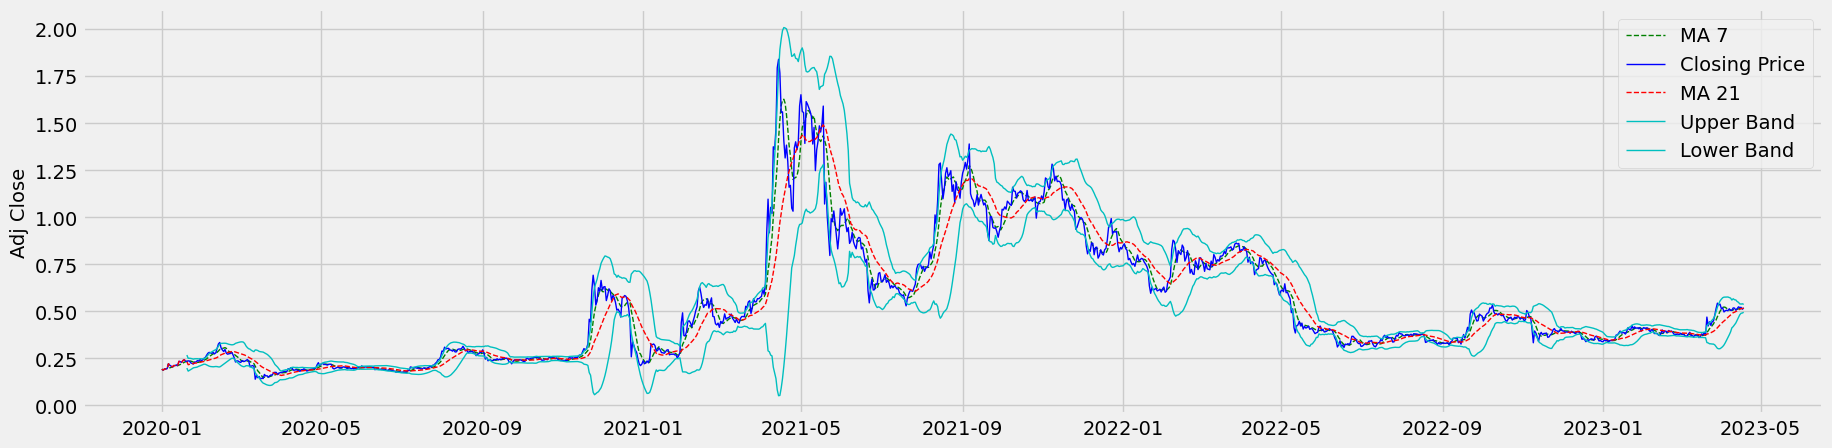

In [13]:
 # Plot first subplot
plt.figure(figsize=(20, 5))
plt.plot(df['MA7', 'XRP-USD'], label='MA 7', color='g', linestyle='--', linewidth=1.0)
plt.plot(df['Adj Close', 'XRP-USD'], label='Closing Price', color='b', linewidth=1.0)
plt.plot(df['MA21', 'XRP-USD'], label='MA 21', color='r', linestyle='--', linewidth=1.0)
plt.plot(df['upper_band', 'XRP-USD'], label='Upper Band', color='c', linewidth=1.0)
plt.plot(df['lower_band', 'XRP-USD'], label='Lower Band', color='c', linewidth=1.0)
plt.ylabel('Adj Close')
plt.legend()


In [13]:
data = df.loc[:, ['Adj Close','Volume', 'MA7', 'MA21', 'MACD', '20SD', 'EMA', 'logmomentum']]
#levels = df.columns.get_level_values(0)[cols]
data.shape

(1204, 78)

In [14]:
SEQ_LEN = 30  # how long of a preceeding sequence to collect for RNN, using the past 60 day stock price
FUTURE_PERIOD_PREDICT = 10 # days, how far into the future are we trying to predict?
COIN_TO_PREDICT =  'ADA-USD'

In [15]:
data['future'] = data['Adj Close', COIN_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
data

Adj Close                                           \
                            ADA-USD  ALGO-USD  ANKR-USD   ATOM-USD   BAT-USD   
Date                                                                           
2020-01-01 00:00:00+00:00  0.033458  0.219938  0.001446   4.380158  0.196129   
2020-01-02 00:00:00+00:00  0.032751  0.213518  0.001397   4.091817  0.183821   
2020-01-03 00:00:00+00:00  0.034180  0.228098  0.001416   4.247897  0.187701   
2020-01-04 00:00:00+00:00  0.034595  0.236382  0.001430   4.286356  0.189891   
2020-01-05 00:00:00+00:00  0.034721  0.231657  0.001418   4.231877  0.188898   
...                             ...       ...       ...        ...       ...   
2023-04-14 00:00:00+00:00  0.438330  0.227652  0.036314  12.262309  0.286126   
2023-04-15 00:00:00+00:00  0.453280  0.232241  0.037160  12.394587  0.285833   
2023-04-16 00:00:00+00:00  0.451755  0.234859  0.037015  12.697115  0.288967   
2023-04-17 00:00:00+00:00  0.434167  0.220693  0.036002  12.341851  0.278806   
2023-04-18 00:00:00+00:00  0.446870  0.225227  0.037674  12.745592  0.285334   

                                                                       \
                              BCH-USD     BNB-USD   CHZ-USD   CRO-USD   
Date                                                                    
2020-01-01 00:00:00+00:00  204.397537   13.689083  0.006654  0.033973   
2020-01-02 00:00:00+00:00  195.698563   13.027011  0.006654  0.032858   
2020-01-03 00:00:00+00:00  222.412979   13.660452  0.007224  0.034666   
2020-01-04 00:00:00+00:00  226.018692   13.891512  0.007601  0.034689   
2020-01-05 00:00:00+00:00  224.096527   14.111019  0.007661  0.034618   
...                               ...         ...       ...       ...   
2023-04-14 00:00:00+00:00  132.494904  329.173859  0.134127  0.070591   
2023-04-15 00:00:00+00:00  132.805786  333.407288  0.133416  0.071222   
2023-04-16 00:00:00+00:00  134.453751  348.220917  0.138526  0.072558   
2023-04-17 00:00:00+00:00  131.615753  339.994110  0.135578  0.069947   
2023-04-18 00:00:00+00:00  133.828247  346.186279  0.138460  0.071975   

                                      ...    Volume                          \
                            DASH-USD  ... THETA-USD     TRX-USD    TUSD-USD   
Date                                  ...                                     
2020-01-01 00:00:00+00:00  41.865791  ...    861040   977215885    99919327   
2020-01-02 00:00:00+00:00  40.223259  ...   1669286   999867628   198862654   
2020-01-03 00:00:00+00:00  44.021961  ...   1512212  1109470187   284264910   
2020-01-04 00:00:00+00:00  46.451866  ...   3118571   991868126   194825762   
2020-01-05 00:00:00+00:00  51.479233  ...   2542730  1079591214   161417973   
...                              ...  ...       ...         ...         ...   
2023-04-14 00:00:00+00:00  60.007286  ...  25414950   249121640  1779093662   
2023-04-15 00:00:00+00:00  59.756329  ...  17972704   160719155   985280749   
2023-04-16 00:00:00+00:00  61.049778  ...  19109325   138908766  1115572735   
2023-04-17 00:00:00+00:00  58.456722  ...  17249971   186846117  1541886997   
2023-04-18 00:00:00+00:00  60.189945  ...  40219072   192398464  1524479488   

                                                                     \
                            VET-USD   XEM-USD    XLM-USD    XMR-USD   
Date                                                                  
2020-01-01 00:00:00+00:00  64586744   5041453  168402204   75903149   
2020-01-02 00:00:00+00:00  59081069   5253256  151848963   81645163   
2020-01-03 00:00:00+00:00  66999698   5138719  168931018  145826653   
2020-01-04 00:00:00+00:00  60583439   8757789  152253766   61952234   
2020-01-05 00:00:00+00:00  60517803   4489886  165956087   51316114   
...                             ...       ...        ...        ...   
2023-04-14 00:00:00+00:00  59591022  12506968   88879571   86220196   
2023-04-15 00:00:00+00:00  39274480   9385899   44548088   765836

In [16]:
import math
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
train_data = data[:training_data_len] 

In [17]:
train_data = data[:training_data_len] 
test_data = data[training_data_len:]
test_data

Adj Close                                           \
                            ADA-USD  ALGO-USD  ANKR-USD   ATOM-USD   BAT-USD   
Date                                                                           
2022-08-22 00:00:00+00:00  0.461446  0.303030  0.037094  11.084868  0.362567   
2022-08-23 00:00:00+00:00  0.465207  0.307729  0.037227  12.117525  0.371596   
2022-08-24 00:00:00+00:00  0.458109  0.302357  0.040271  13.016421  0.368381   
2022-08-25 00:00:00+00:00  0.464999  0.307252  0.041060  12.869333  0.373507   
2022-08-26 00:00:00+00:00  0.430863  0.282159  0.036941  11.499005  0.336370   
...                             ...       ...       ...        ...       ...   
2023-04-14 00:00:00+00:00  0.438330  0.227652  0.036314  12.262309  0.286126   
2023-04-15 00:00:00+00:00  0.453280  0.232241  0.037160  12.394587  0.285833   
2023-04-16 00:00:00+00:00  0.451755  0.234859  0.037015  12.697115  0.288967   
2023-04-17 00:00:00+00:00  0.434167  0.220693  0.036002  12.341851  0.278806   
2023-04-18 00:00:00+00:00  0.446870  0.225227  0.037674  12.745592  0.285334   

                                                                       \
                              BCH-USD     BNB-USD   CHZ-USD   CRO-USD   
Date                                                                    
2022-08-22 00:00:00+00:00  122.857780  300.559113  0.221774  0.128078   
2022-08-23 00:00:00+00:00  133.494919  299.029938  0.249499  0.128778   
2022-08-24 00:00:00+00:00  131.212296  296.449677  0.242247  0.128995   
2022-08-25 00:00:00+00:00  130.680695  301.583649  0.224285  0.131664   
2022-08-26 00:00:00+00:00  116.286339  279.598175  0.207100  0.120310   
...                               ...         ...       ...       ...   
2023-04-14 00:00:00+00:00  132.494904  329.173859  0.134127  0.070591   
2023-04-15 00:00:00+00:00  132.805786  333.407288  0.133416  0.071222   
2023-04-16 00:00:00+00:00  134.453751  348.220917  0.138526  0.072558   
2023-04-17 00:00:00+00:00  131.615753  339.994110  0.135578  0.069947   
2023-04-18 00:00:00+00:00  133.828247  346.186279  0.138460  0.071975   

                                      ...    Volume                         \
                            DASH-USD  ... THETA-USD    TRX-USD    TUSD-USD   
Date                                  ...                                    
2022-08-22 00:00:00+00:00  47.249470  ...  27919688  372955310   225865558   
2022-08-23 00:00:00+00:00  48.538738  ...  24609667  478282039   185516330   
2022-08-24 00:00:00+00:00  49.273899  ...  29755078  444387152   206211899   
2022-08-25 00:00:00+00:00  49.247395  ...  34567195  401181549   202826467   
2022-08-26 00:00:00+00:00  44.251270  ...  87312111  580164367   432150892   
...                              ...  ...       ...        ...         ...   
2023-04-14 00:00:00+00:00  60.007286  ...  25414950  249121640  1779093662   
2023-04-15 00:00:00+00:00  59.756329  ...  17972704  160719155   985280749   
2023-04-16 00:00:00+00:00  61.049778  ...  19109325  138908766  1115572735   
2023-04-17 00:00:00+00:00  58.456722  ...  17249971  186846117  1541886997   
2023-04-18 00:00:00+00:00  60.189945  ...  40219072  192398464  1524479488   

                                                                     \
                            VET-USD   XEM-USD    XLM-USD    XMR-USD   
Date                                                                  
2022-08-22 00:00:00+00:00  81680543   7407781  106285743  100084496   
2022-08-23 00:00:00+00:00  81146770  15014310  106370062  104083826   
2022-08-24 00:00:00+00:00  77281580  12818616   99891183  103296087   
2022-08-25 00:00:00+00:00  63649679  18796358   98602272   81474548   
2022-08-26 00:00:00+00:00  98403319  18403526  177849583  114446697   
...                             ...       ...        ...        ...   
2023-04-14 00:00:00+00:00  59591022  12506968   88879571   86220196   
2023-04-15 00:00:00+00:00  39274480   9385899   44548088   76583604   
2023-04-

In [18]:
X_train= train_data.drop("future",axis= 1)
Y_train =train_data["future"]

In [19]:
X_test= test_data.drop("future",axis= 1)
Y_test =test_data["future"]
print(Y_test)

Date
2022-08-22 00:00:00+00:00    0.457481
2022-08-23 00:00:00+00:00    0.454559
2022-08-24 00:00:00+00:00    0.480387
2022-08-25 00:00:00+00:00    0.503084
2022-08-26 00:00:00+00:00    0.499121
                               ...   
2023-04-14 00:00:00+00:00         NaN
2023-04-15 00:00:00+00:00         NaN
2023-04-16 00:00:00+00:00         NaN
2023-04-17 00:00:00+00:00         NaN
2023-04-18 00:00:00+00:00         NaN
Name: future, Length: 240, dtype: float64


In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train)

X_test_sc=min_max_scaler.fit_transform(X_test)

In [21]:
scaler = MinMaxScaler()
Y_train_sc = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_sc = scaler.fit_transform(Y_test.values.reshape(-1, 1))
#Y_train_sc
# convert the scaled data back to a Pandas Series
#scaled_series = pd.Series(Y_train_sc.reshape(-1))

In [22]:
X_train =[]
y_train =[]
for i in range(SEQ_LEN,len(X_train_sc)):
    X_train.append(X_train_sc[i-SEQ_LEN:i])
    y_train.append(Y_train_sc[i][0])
X_train,y_train = np.array(X_train),np.array(y_train)   

In [23]:
X_train,y_train = np.array(X_train),np.array(y_train) 

In [24]:
print(X_train.shape)
print(y_train.shape)

(934, 30, 78)
(934,)


In [25]:
X_test =[]
y_test =[]

for i in range(SEQ_LEN,len(X_test_sc)):
    X_test.append(X_test_sc[i-SEQ_LEN:i])
    y_test.append(Y_test_sc[i][0])
X_test = np.array(X_test)  

In [26]:
X_train_shape = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
X_train_shape.shape

(934, 30, 78)

In [ ]:
model = Sequential()
model.add(LSTM(units=512, activation = 'softplus',return_sequences=True, input_shape=(X_train_shape.shape[1], X_train_shape.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=256,activation = 'softplus', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64))
model.add(Dropout(0.5))


model.add(Dense(units=1, activation = 'linear'))
opt =tf.keras.optimizers.Adam(
    learning_rate=0.001,
       
    name='Adam')
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train_shape, y_train, epochs=20, batch_size=16,validation_split  = 0.2)

Epoch 1/20
47/47 [==============================] - 26s 486ms/step - loss: 0.1585 - mae: 0.3138 - val_loss: 0.0102 - val_mae: 0.0682
Epoch 2/20
47/47 [==============================] - 22s 476ms/step - loss: 0.1080 - mae: 0.2735 - val_loss: 0.0080 - val_mae: 0.0805
Epoch 3/20
47/47 [==============================] - 22s 478ms/step - loss: 0.1035 - mae: 0.2701 - val_loss: 0.0178 - val_mae: 0.1183
Epoch 4/20
47/47 [==============================] - 23s 484ms/step - loss: 0.0907 - mae: 0.2511 - val_loss: 0.0403 - val_mae: 0.1851
Epoch 5/20
47/47 [==============================] - 24s 504ms/step - loss: 0.0956 - mae: 0.2610 - val_loss: 0.0253 - val_mae: 0.1432
Epoch 6/20
47/47 [==============================] - 23s 490ms/step - loss: 0.0909 - mae: 0.2569 - val_loss: 0.0304 - val_mae: 0.1580
Epoch 7/20
47/47 [==============================] - 23s 485ms/step - loss: 0.0883 - mae: 0.2535 - val_loss: 0.0372 - val_mae: 0.1766
Epoch 8/20
47/47 [==============================] - 23s 485ms/step - 

In [36]:
print(history.history['mae'][-10:]), print(history.history['val_mae'][-10:])

[0.2739524245262146, 0.2682483196258545, 0.26340439915657043, 0.27381446957588196, 0.2566968500614166, 0.2633240222930908, 0.24978433549404144, 0.25328880548477173, 0.2503117620944977, 0.25096043944358826]
[0.07028141617774963, 0.06253711879253387, 0.06718610227108002, 0.07460053265094757, 0.07068581134080887, 0.06322547048330307, 0.07742375135421753, 0.07118966430425644, 0.06255412101745605, 0.06943517923355103]


(None, None)

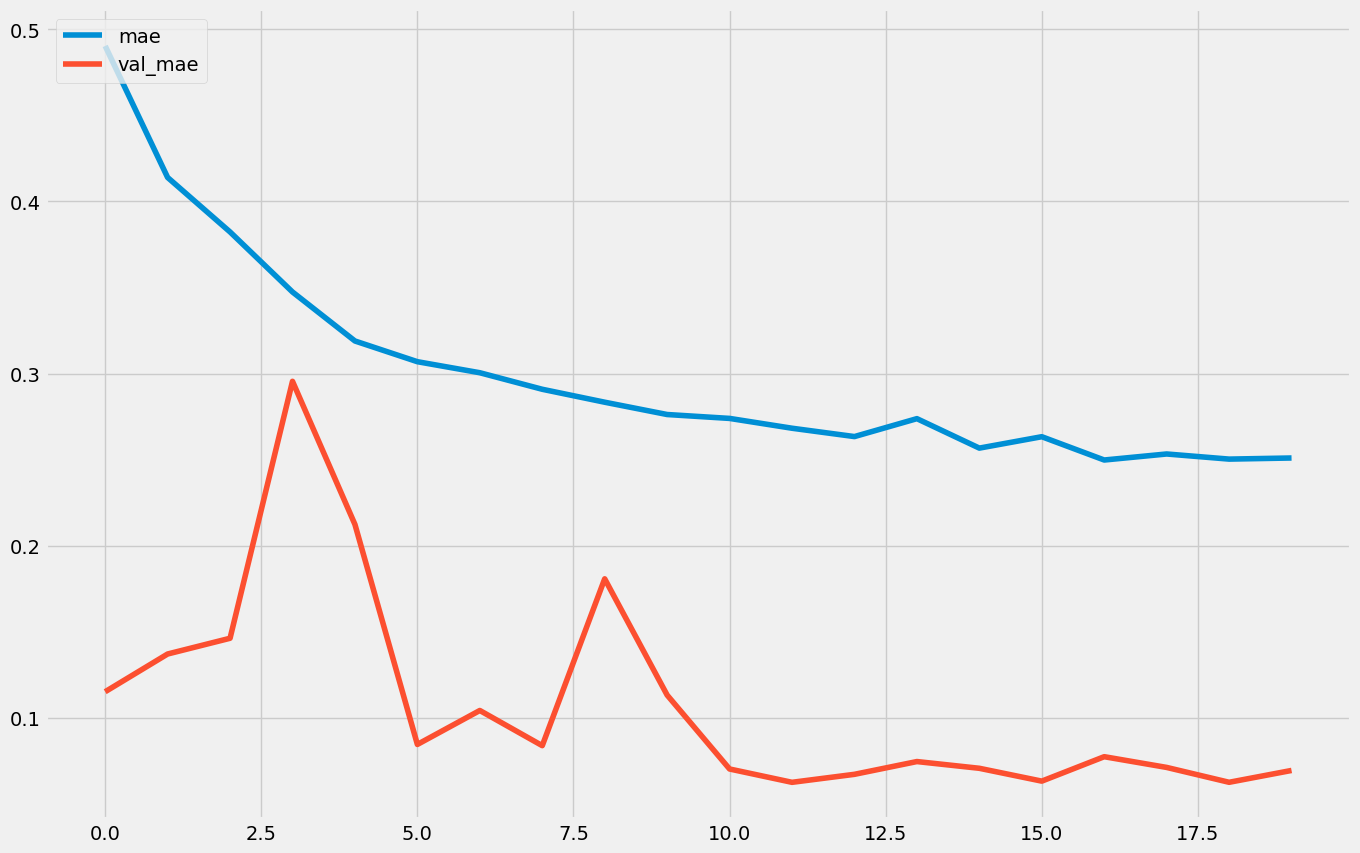

In [37]:
plt.figure(figsize =(15,10))
plt.plot(history.history['mae'],label= 'mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend(loc="upper left")
plt.show()

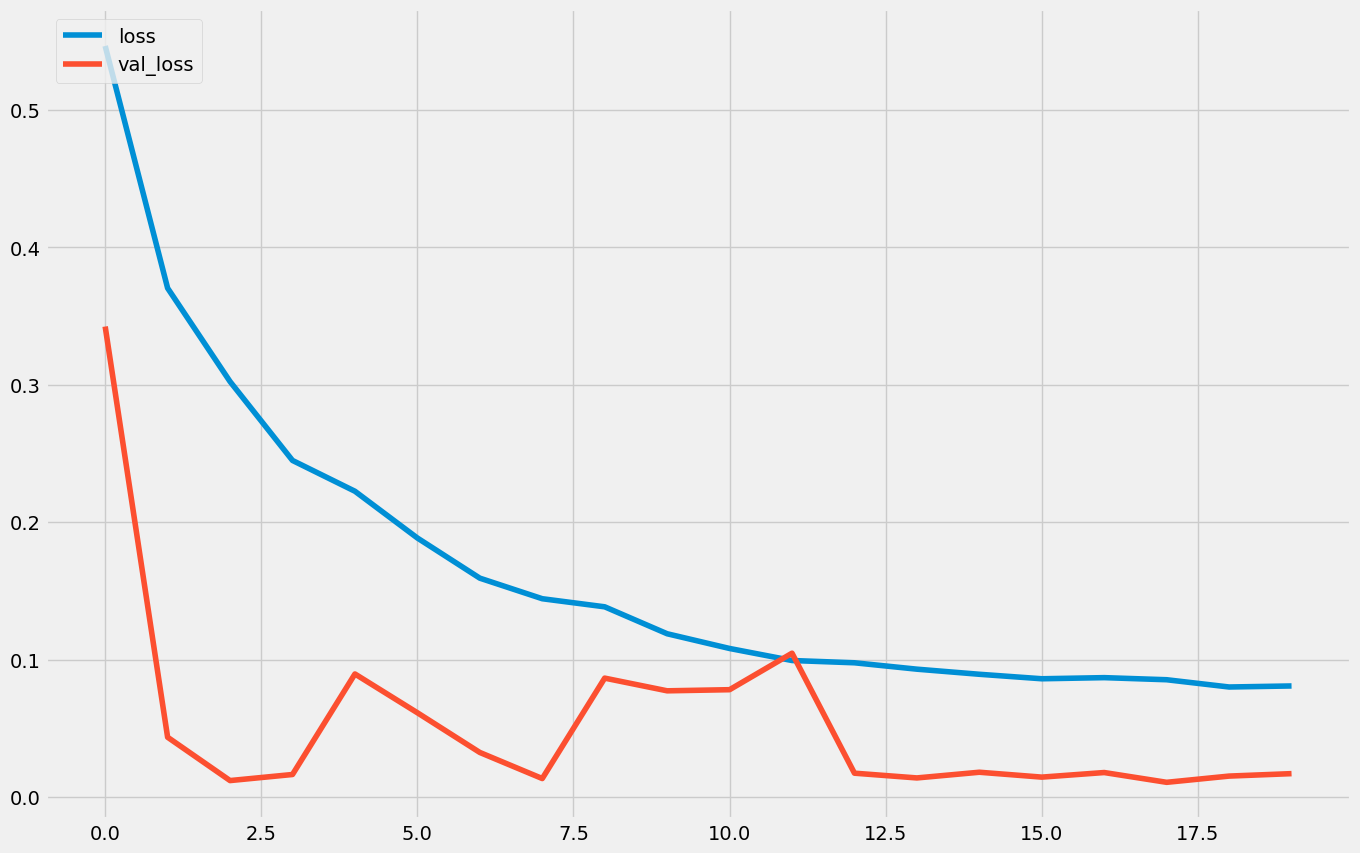

In [34]:
plt.figure(figsize =(15,10))
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc="upper left")
plt.show()

In [221]:
import math
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
train_data = data[:training_data_len] 

In [222]:
y_pred = model.predict(X_test)

7/7 [==============================] - 2s 222ms/step


In [223]:
print(r2(y_test[:-10], y_pred[:-10]))

-0.07192073984242042
